In [1]:
def add_to_class(Class):
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch import nn
from torch.nn import functional as F
import torchaudio
from torchaudio import datasets
import torchtext
from torchaudio.utils import download_asset

import os
import time
from tqdm import tqdm
import IPython.display as ipd

In [ ]:
!pip install lightning

In [5]:
import lightning as L

In [6]:
import sys
LIB_PATH = '/content/drive/MyDrive/GSC/GSC_helper'

sys.path.append(LIB_PATH)
from EdgeCRNN_git import EdgeCRNN
from GSC_zip import unzipzip, zipzip
from GSC import download_GSC

## Download Data

### None Augmentation MFCC
Using for none-aug experiment and online-aug experiment

In [ ]:
ZIP_MAP = download_GSC('https://drive.google.com/file/d/12UiSuebf6878mZad0-h_tGRuF-s1biOW/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-SoDKgvgJuEU2gvM-Nf16tbygKyRxwJl/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-T1hfKClKy_BlRlNm-1X2HulWlCiPyVD/view?usp=drive_link',
                       '/content/GSC_12_LFBE',
                       end = '.zip')
CSV_MAP = download_GSC('https://drive.google.com/file/d/1-TXH4WfK91yHyG00GnkDnpd3Hh6m-BMI/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-CSGlpW8FprokSolY72pkdYqlhRl-LH2/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-PYGDCXzaTD3ZR7J0brMzfz4L3tSUBYl/view?usp=drive_link',
                       '/content/GSC_12_LFBE',
                       end = '.csv')

Downloading...
From (original): https://drive.google.com/uc?id=12UiSuebf6878mZad0-h_tGRuF-s1biOW
From (redirected): https://drive.google.com/uc?id=12UiSuebf6878mZad0-h_tGRuF-s1biOW&confirm=t&uuid=5628a345-97d5-41fc-a45f-635658d953ce
To: /content/GSC_12_LFBE/train.zip
100%|██████████| 1.27G/1.27G [00:23<00:00, 54.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-SoDKgvgJuEU2gvM-Nf16tbygKyRxwJl
From (redirected): https://drive.google.com/uc?id=1-SoDKgvgJuEU2gvM-Nf16tbygKyRxwJl&confirm=t&uuid=445f3517-9eb7-4261-b9d0-782c6c56fe5a
To: /content/GSC_12_LFBE/val.zip
100%|██████████| 149M/149M [00:04<00:00, 37.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-T1hfKClKy_BlRlNm-1X2HulWlCiPyVD
From (redirected): https://drive.google.com/uc?id=1-T1hfKClKy_BlRlNm-1X2HulWlCiPyVD&confirm=t&uuid=e114b950-a344-4bac-b229-fa6e4130fd59
To: /content/GSC_12_LFBE/test.zip
100%|██████████| 72.8M/72.8M [00:01<00:00, 47.3MB/s]
Downloading...
From: https://drive.google.

## GSC12 follow the original paper

In [8]:
ZIP_MAP = download_GSC('https://drive.google.com/file/d/1uhhv2snQPwlKncnsL27beNgADT9ILlEX/view?usp=drive_link',
                       'https://drive.google.com/file/d/1--Gh-mdR_Qlx3a3-Efe8UN_SbOBYKVCD/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-4oTVfP0u_7tGWVuUg1eXQ2wlswl1vee/view?usp=drive_link',
                       '/content/GSC_12_LFBE',
                       end = '.zip')
CSV_MAP = download_GSC('https://drive.google.com/file/d/1-BpTgFe3FPKm-WOIcUM8pur2jhA5ZrQf/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-ITEh47BBW-qRfZOX9hBqvCcvJnTxQRB/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-KTNRwnfUNw_b_wnxwE2tEIZTsI-VklS/view?usp=drive_link',
                       '/content/GSC_12_LFBE',
                       end = '.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1uhhv2snQPwlKncnsL27beNgADT9ILlEX
From (redirected): https://drive.google.com/uc?id=1uhhv2snQPwlKncnsL27beNgADT9ILlEX&confirm=t&uuid=4ed3ef2a-c5a7-4c0d-8a73-7fd75fc3eb55
To: /content/GSC_12_LFBE/train.zip
100%|██████████| 2.20G/2.20G [00:23<00:00, 93.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1--Gh-mdR_Qlx3a3-Efe8UN_SbOBYKVCD
From (redirected): https://drive.google.com/uc?id=1--Gh-mdR_Qlx3a3-Efe8UN_SbOBYKVCD&confirm=t&uuid=675276ba-b129-4c3d-9c6d-add05f93ce10
To: /content/GSC_12_LFBE/val.zip
100%|██████████| 65.8M/65.8M [00:00<00:00, 105MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1-4oTVfP0u_7tGWVuUg1eXQ2wlswl1vee
From (redirected): https://drive.google.com/uc?id=1-4oTVfP0u_7tGWVuUg1eXQ2wlswl1vee&confirm=t&uuid=5d88d457-fce9-4bf8-ab2c-07b80ca62611
To: /content/GSC_12_LFBE/test.zip
100%|██████████| 72.8M/72.8M [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google

## Dataset

In [9]:
TRAIN_TRANSFORM = torchaudio.transforms.SpecAugment(n_time_masks = 2,
                                      time_mask_param = 20,
                                      n_freq_masks = 2,
                                      freq_mask_param = 20)

In [10]:
class GSC(torch.utils.data.Dataset):
    def __init__(self, root, subset = 'train', zip_map = None, csv_map = None, unzip = True):
        super().__init__()
        local_path = os.path.join(root, subset)
        self.root = root
        if not os.path.exists(local_path):
            os.mkdir(local_path)
            unzipzip(zip_map[subset], local_path)
        if unzip:
            unzipzip(zip_map[subset], local_path)
        self.csv = pd.read_csv(csv_map[subset])
        self.subset = subset

    def __getitem__(self, idx):
        row = self.csv.iloc[idx]
        spec = np.load(os.path.join(self.root, row['link']))['arr_0']
        spec = torch.from_numpy(spec).unsqueeze(0)
        if self.subset == 'train':
            spec = TRAIN_TRANSFORM(spec)
        return spec, row['label']

    def __len__(self):
        return len(self.csv)

In [11]:
class SC_12(L.LightningDataModule):
    def __init__(self, root, batch_size, zip_map, csv_map):
        super().__init__()
        self.root = root
        self.batch_size = batch_size
        self.train_dataset = GSC(root,
                                 subset = 'train',
                                 zip_map = zip_map,
                                 csv_map = csv_map,
                                 unzip = False)
        self.val_dataset = GSC(root,
                               subset = 'val',
                               zip_map = zip_map,
                               csv_map = csv_map,
                               unzip = False)
        self.test_dataset = GSC(root,
                                subset = 'test',
                                zip_map = zip_map,
                                csv_map = csv_map,
                                unzip = False)

    def train_dataloader(self):
        return torch.utils.data.DataLoader(self.train_dataset,
                                           batch_size = self.batch_size,
                                           shuffle = True,
    #                                       collate_fn = self.collate_fn,
                                           num_workers = 1,
                                           prefetch_factor = 1,
    #                                       pin_memory = True,
                                           drop_last = True)

    def val_dataloader(self):
        return torch.utils.data.DataLoader(self.val_dataset,
                                           batch_size = self.batch_size,
                                           shuffle = False,
     #                                      collate_fn = self.collate_fn,
                                           num_workers = 1,
                                           prefetch_factor = 1,
     #                                      pin_memory = True,
                                           drop_last = True)

    def test_dataloader(self):
        return torch.utils.data.DataLoader(self.test_dataset,
                                           batch_size = self.batch_size,
                                           shuffle = False,
      #                                     collate_fn = self.collate_fn,
                                           num_workers = 1,
                                           prefetch_factor = 1,
      #                                     pin_memory = True,
                                           drop_last = True)

## Model

In [12]:
class EdgeCRNN_training(L.LightningModule):
    def __init__(self,
                 lr: float,
                 in_channels: int,
                 hidden_size: int,
                 num_classes: int,
                 width_multiplier: int = 1,
                 *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        #self.automatic_optimization = False
        self.lr = lr
        self.net = EdgeCRNN()

    def forward(self, input):
        return self.net(input)

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

net = EdgeCRNN_training(lr = 1e-3,
                        in_channels = 1,
                        hidden_size = 64,
                        num_classes = 12)
summary(net, input_size = (1, 1, 39, 101))

Layer (type:depth-idx)                        Output Shape              Param #
EdgeCRNN_training                             [1, 12]                   --
├─EdgeCRNN: 1-1                               [1, 12]                   --
│    └─Sequential: 2-1                        [1, 24, 39, 101]          --
│    │    └─Conv2d: 3-1                       [1, 24, 39, 101]          216
│    │    └─BatchNorm2d: 3-2                  [1, 24, 39, 101]          48
│    │    └─ReLU: 3-3                         [1, 24, 39, 101]          --
│    └─MaxPool2d: 2-2                         [1, 24, 20, 51]           --
│    └─Sequential: 2-3                        [1, 288, 3, 7]            --
│    │    └─EdgeCRNN_Residual: 3-4            [1, 72, 10, 26]           3,900
│    │    └─EdgeCRNN_Residual: 3-5            [1, 72, 10, 26]           3,132
│    │    └─EdgeCRNN_Residual: 3-6            [1, 144, 5, 13]           17,568
│    │    └─EdgeCRNN_Residual: 3-7            [1, 144, 5, 13]           11,448
│    

In [13]:
def warm_up(lr_init, lr_end, epoch, total_epochs):
    return lr_init - epoch*(lr_init - lr_end)/total_epochs

In [14]:
@add_to_class(EdgeCRNN_training)
def accuracy(self, Y_hat, Y, averaged = True):
    """
    Compute the number of correct predictions
    """
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(dim = 1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

@add_to_class(EdgeCRNN_training)
def training_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.forward(x)
    loss = self.loss(y_hat, y)
    acc = self.accuracy(y_hat, y)

    # single scheduler
    # sch = self.lr_schedulers()
    #sch.step()
    torch.nn.utils.clip_grad_norm(self.parameters(), 5)

    values = {"train_loss": loss, "train_acc": acc}
    self.log_dict(values, prog_bar = True)
    return loss

@add_to_class(EdgeCRNN_training)
def validation_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.forward(x)
    loss = self.loss(y_hat, y)
    acc = self.accuracy(y_hat, y)
    values = {"val_loss": loss, "val_acc": acc}
    self.log_dict(values, prog_bar = True)

@add_to_class(EdgeCRNN_training)
def test_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.forward(x)
    loss = self.loss(y_hat, y)
    acc = self.accuracy(y_hat, y)
    values = {"test_loss": loss, "test_acc": acc}
    self.log_dict(values, prog_bar = True)

@add_to_class(EdgeCRNN_training)
def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), self.lr, weight_decay = 0.00005)
    return optimizer

@add_to_class(EdgeCRNN_training)
def optimizer_step(self, epoch, batch_idx, optimizer, optimizer_closure):
    # update params
    optimizer.step(closure = optimizer_closure)

    # manually warm up lr withou a scheduler
    lr = warm_up(self.lr, 1e-4, epoch, 500)
    for pg in optimizer.param_groups:
        pg['lr'] = lr

In [15]:
@add_to_class(EdgeCRNN_training)
def loss(self, y_hat, y):
    return F.cross_entropy(y_hat, y, reduction = 'mean')

In [16]:
data_12 = SC_12('/content/GSC_12_LFBE', 128, ZIP_MAP, CSV_MAP)

Extracted /content/GSC_12_LFBE/train.zip
Extracted /content/GSC_12_LFBE/val.zip
Extracted /content/GSC_12_LFBE/test.zip


In [17]:
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint
early_stopping_callback = EarlyStopping(monitor = "val_acc", min_delta = 0.00001, patience = 15, mode = "max")
checkpoint_callback = ModelCheckpoint(dirpath = '/content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_standard_git',
                                      save_top_k = 7, monitor = 'val_acc',
                                      mode = 'max',
                                      filename = 'mdtc-gsc-12-{epoch:02d}-{val_loss:.2f}-{val_acc:.4f}')

## Non

In [ ]:
from lightning.pytorch import seed_everything

seed_everything(42)

net = EdgeCRNN_training(lr = 1e-3,
                        in_channels = 1,
                        hidden_size = 64,
                        num_classes = 12)

trainer = L.Trainer(accelerator="gpu",
                    callbacks = [early_stopping_callback, checkpoint_callback],
                    enable_checkpointing=True,
                    default_root_dir = "/content/drive/MyDrive/GSC_ckpt/EdgeCRNN/logging_non_standard_git",
                    max_epochs=500)
trainer.fit(net, data_12, ckpt_path = '/content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_standard_git/mdtc-gsc-12-epoch=68-val_loss=0.14-val_acc=0.9591.ckpt')

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_standard_git/mdtc-gsc-12-epoch=68-val_loss=0.14-val_acc=0.9591.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_standard_git/mdtc-gsc-12-epoch=68-val_loss=0.14-val_acc=0.9591.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

<ipython-input-22-accdc03f7fa6>:21: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.parameters(), 5)


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [18]:
from lightning.pytorch import seed_everything

seed_everything(42)

net = EdgeCRNN_training(lr = 1e-3,
                        in_channels = 1,
                        hidden_size = 64,
                        num_classes = 12)

trainer = L.Trainer(accelerator="gpu",
                    callbacks = [early_stopping_callback, checkpoint_callback],
                    enable_checkpointing=True,
                    default_root_dir = "/content/drive/MyDrive/GSC_ckpt/EdgeCRNN/logging_non_standard_git",
                    max_epochs=500)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
def test(trainer, model, dataloaders, ckpt_directory):
    ckpt_paths = os.listdir(ckpt_directory)
    loss = []
    acc = []
    for ckpt_path in ckpt_paths:
        logger = trainer.test(model = model,
                              dataloaders = dataloaders,
                              ckpt_path = os.path.join(ckpt_directory, ckpt_path),
                              verbose = False)
        loss.append(logger[0]['test_loss'])
        acc.append(logger[0]['test_acc'])
    return loss, acc, sum(loss)/len(loss), sum(acc)/len(acc)

In [ ]:
loss1, acc1, mloss1, macc1 = test(trainer, net, data_12, '/content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git')

INFO: Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=32-val_loss=0.09-val_acc=0.9714.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=32-val_loss=0.09-val_acc=0.9714.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=32-val_loss=0.09-val_acc=0.9714.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=32-val_loss=0.09-val_acc=0.9714.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

INFO: Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=36-val_loss=0.10-val_acc=0.9686.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=36-val_loss=0.10-val_acc=0.9686.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=36-val_loss=0.10-val_acc=0.9686.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=36-val_loss=0.10-val_acc=0.9686.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

INFO: Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=38-val_loss=0.10-val_acc=0.9689.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=38-val_loss=0.10-val_acc=0.9689.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=38-val_loss=0.10-val_acc=0.9689.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=38-val_loss=0.10-val_acc=0.9689.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

INFO: Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=39-val_loss=0.10-val_acc=0.9690.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=39-val_loss=0.10-val_acc=0.9690.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=39-val_loss=0.10-val_acc=0.9690.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=39-val_loss=0.10-val_acc=0.9690.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

INFO: Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=42-val_loss=0.10-val_acc=0.9682.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=42-val_loss=0.10-val_acc=0.9682.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=42-val_loss=0.10-val_acc=0.9682.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_non_git/mdtc-gsc-12-epoch=42-val_loss=0.10-val_acc=0.9682.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

In [ ]:
print('Max acc on Non 1 set:',max(acc1))
print('Mean acc on Non 1 ckpt set:', macc1)

Max acc on Non 1 set: 0.9401727318763733
Mean acc on Non 1 ckpt set: 0.9322779774665833


In [ ]:
acc1.index(max(acc1))

3

In [ ]:
acc1

[0.9231085777282715,
 0.9307154417037964,
 0.9272204041481018,
 0.9401727318763733,
 0.9401727318763733]

In [ ]:
loss1

[0.24981895089149475,
 0.22943727672100067,
 0.23667173087596893,
 0.18764425814151764,
 0.19631807506084442]

In [ ]:
loss2, acc2, mloss2, macc2 = test(trainer, net, data_12, '/content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_standard_git')

In [ ]:
print('Max acc on Non 2 set:',max(acc2))
print('Mean acc on Non 2 ckpt set:', macc2)

Max acc on Non 2 set: 0.9615542888641357
Mean acc on Non 2 ckpt set: 0.9562382612909589


In [ ]:
acc2

[0.9498355388641357,
 0.9537417888641357,
 0.9555920958518982,
 0.9615542888641357,
 0.9576480388641357,
 0.9574424624443054,
 0.9578536152839661]

In [19]:
from GSC_eval import predict, plot_confmat, FRR_FAR

38it [01:02,  1.66s/it]


(<Figure size 500x500 with 2 Axes>, <Axes: >)

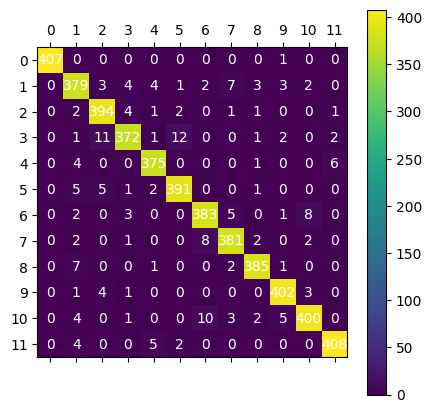

In [21]:
confmat = predict(net, data_12.test_dataloader(), 12, '/content/drive/MyDrive/GSC_ckpt/EdgeCRNN/best_model_standard_git/mdtc-gsc-12-epoch=59-val_loss=0.13-val_acc=0.9598.ckpt')
plot_confmat(confmat, 12, 'edgecrnn_gitbub+specaug', '/content/drive/MyDrive/GSC_ckpt/EdgeCRNN/visualize')

In [22]:
fnr = FRR_FAR(confmat, 7)
far = FRR_FAR(confmat, 0)
print(fnr, far)

3.7878811359405518 0.2451002597808838


In [ ]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

In [ ]:
losses = []
accs = []
epochs = []
for summary in summary_iterator("/content/mdtc1/lightning_logs/version_0/events.out.tfevents.1710942302.83bc5cce5f93.436.0"):
    ss = summary.summary.value
    for s in ss:
      if s.tag == 'train_loss':
          losses.append(s.simple_value)
      if s.tag == 'epochs':
          epochs.append(s.simple_value)
      if s.tag == 'val_acc':
          accs.append(s.simple_value)

In [ ]:
epochs

[]

In [ ]:
max(accs)

0.9558503031730652